In [5]:
import requests as r
import datetime as dt
import csv
from PIL import Image
from IPython.display import display
from urllib.parse import quote


12:06:21.000007 Hora - Minuto - Segundo - Milésimo
----------
2020-04-25 Ano - Mês - Dia
----------
2020-04-25 12:06:21.000007 Ano - Mês - Dia - Hora - Minuto - Segundo - Milésimo


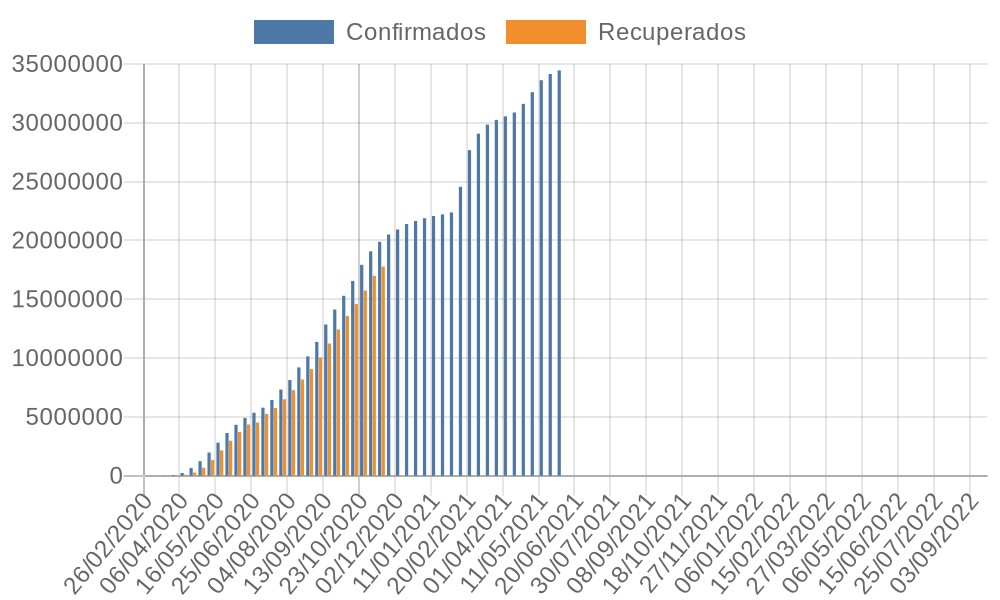

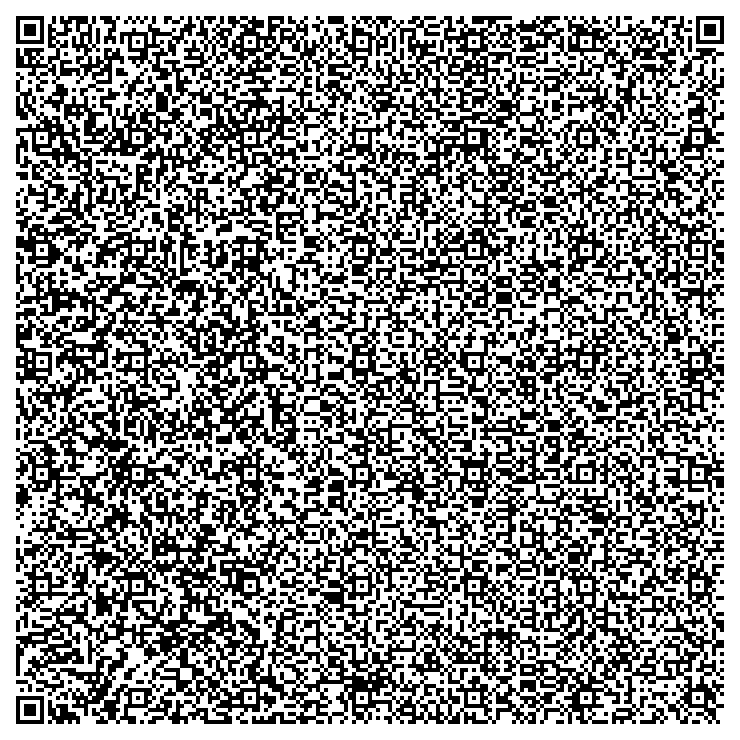

In [6]:
url = "https://api.covid19api.com/dayone/country/brazil"

resp = r.get(url)
#resp.status_code

raw_data = resp.json()
#raw_data[0]

final_data = []

for i in raw_data:
    final_data.append([i['Confirmed'], i['Deaths'], i['Recovered'], i['Active'], i['Date']])
final_data.insert(0, ['Confirmados', 'Obitos', 'Recuperados', 'Ativos', 'Data'])
#final_data

CONFIRMADOS = 0
OBITOS = 1
RECUPERADOS = 2
ATIVOS = 3
DATA = 4

for i in range(1, len(final_data)):
    final_data[i][DATA] = final_data[i][DATA][:10]
#final_data

#print(dt.time(12, 6, 21, 7), "Hora - Minuto - Segundo - Milésimo")
#print("----------")
#print(dt.date(2020, 4, 25), "Ano - Mês - Dia")
#print("----------")
#print(dt.datetime(2020, 4, 25, 12, 6, 21, 7), "Ano - Mês - Dia - Hora - Minuto - Segundo - Milésimo")

with open("brasil-covid.csv", "w") as file:
    writer = csv.writer(file)
    writer.writerows(final_data)
for i in range(1, len(final_data)):
    final_data[i][DATA] = dt.datetime.strptime(final_data[i][DATA], '%Y-%m-%d')
#final_data

def get_datasets(y, labels):
    if type(y[0] == list):
        datasets = []
        for i in range(len(y)):
            datasets.append({
                'label': labels[i],
                'data': y[i]
            })
        return datasets
    else:
        return [
            {
                'label': labels[0],
                'data': y
            }
        ]
def set_title(title=''):
    if title != "":
        display = 'true'
    else:
        display = "false"
    return {
        'title': title,
        'display': display
    }
def create_chart(x, y, labels, kind='bar', title=''):
    
    datasets = get_datasets(y, labels)
    options = set_title(title)
    
    chart = {
        'type': kind,
        'data': {
            'labels': x,
            'datasets': datasets
        },
        'options': options
    }
    
    return chart
def get_api_chart(chart):
    url_base = 'https://quickchart.io/chart'
    resp = r.get(f"{url_base}?c={str(chart)}")
    return resp.content
def save_image(path, content):
    with open(path, 'wb') as image:
        image.write(content)

def display_image(path):
    img_pil = Image.open(path)
    display(img_pil)
y_data_1 = []
for i in final_data[1::20]:                   # Aumentei o salto de 20 em 20 dias para poder gerar o qrcode em data_1 e data_2
    y_data_1.append(i[CONFIRMADOS])
    
y_data_2 = []
for i in final_data[1::20]:                   
    y_data_2.append(i[RECUPERADOS])
    
labels = ['Confirmados', 'Recuperados']

x = []
for i in final_data[1::10]:
    x.append(i[DATA].strftime('%d/%m/%Y'))
    
    
chart = create_chart(x, [y_data_1, y_data_2], labels, title='Gráfico -- Confirmados vs Recuperados')
chart_content = get_api_chart(chart)
save_image('primeiro-grafico.png', chart_content)
display_image('primeiro-grafico.png')

def get_api_qrcode(link):
    text = quote(link) 
    url_base = 'https://quickchart.io/qr'
    resp = r.get(f"{url_base}?text={text}")
    return resp.content
url_base = 'https://quickchart.io/chart'
link = f"{url_base}?c={str(chart)}"
save_image('qr-code.png', get_api_qrcode(link))
display_image('qr-code.png')